In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import chi2

In [2]:
df= pd.read_csv(r"C:\Users\Pranamya Sinha\Downloads\datas\cubic_zirconia.csv")

In [3]:
df.nunique()

Unnamed: 0    26967
carat           257
cut               5
color             7
clarity           8
depth           169
table           112
x               531
y               526
z               356
price          8742
dtype: int64

In [4]:
df.drop(labels='Unnamed: 0', axis=1)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [5]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [6]:
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [7]:
df.describe(include='object')

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


In [8]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

# Outliers Detection

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='depth'>

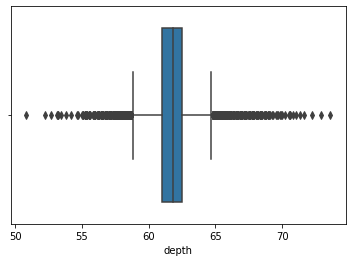

In [9]:
sns.boxplot(df['depth'])

In [10]:
#By looking at the boxplot we can interpret alot of elements are present as an ouliers in caseof depth.
# Inorder to get exact number of elements present as an outlier we are using Inter quartile range

In [11]:
Q1= df.depth.quantile(0.25)
Q3= df.depth.quantile(0.75)
Q1,Q3

(61.0, 62.5)

In [12]:
IQR = Q3 - Q1
IQR

1.5

In [13]:
# Determining Lower and Upper limit of the Depth
ll = Q1-1.5*IQR         
ul = Q3+1.5*IQR
ll, ul

(58.75, 64.75)

In [14]:
df[(df.depth<ll) | (df.depth>ul)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
14,15,1.50,Fair,G,VS2,66.2,53.0,7.12,7.08,4.70,10644
50,51,0.50,Premium,F,SI2,58.0,62.0,5.21,5.18,3.01,1031
58,59,0.50,Good,E,VS2,64.9,59.0,4.89,4.94,3.19,1389
73,74,0.70,Premium,E,VS1,58.4,59.0,5.91,5.83,3.43,2854
100,101,1.02,Fair,J,SI1,66.8,55.0,6.25,6.18,4.15,3027
...,...,...,...,...,...,...,...,...,...,...,...
26784,26785,1.01,Fair,G,SI2,58.7,67.0,6.52,6.56,3.84,3816
26806,26807,0.67,Fair,F,SI1,56.0,67.0,5.81,5.78,3.25,1642
26842,26843,0.63,Fair,H,VS1,57.3,62.5,5.65,5.70,3.25,1760
26925,26926,0.90,Fair,F,VS1,66.2,55.0,6.11,5.97,4.00,4183


In [15]:
#Total 1225 elements are prsent as an oulier outof 26967 (for depth)

### Handling Null Values 

In [16]:
#Null value is only present in case of depth of the elements 

In [17]:
df['depth'] = df['depth'].fillna(df['depth'].median(),axis=0)

In [18]:
# Since depth contains numerical variable and outliers are present , null values are handled by using median

# Correlation

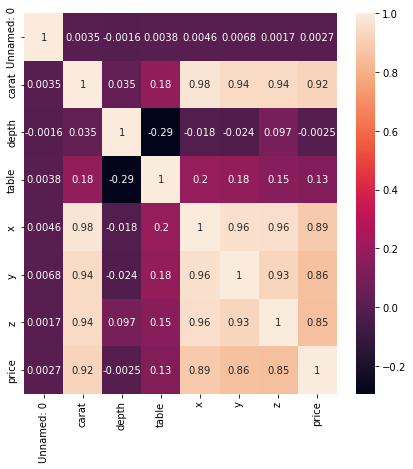

,Unnamed: 0,carat,depth,table,x,y,z,price
Unnamed: 0,1.000000,0.003490,-0.001582,0.003817,0.004626,0.006844,0.001681,0.002650
carat,0.003490,1.000000,0.034895,0.181685,0.976368,0.941071,0.940640,0.922416
depth,-0.001582,0.034895,1.000000,-0.293958,-0.018431,-0.024399,0.097413,-0.002519
table,0.003817,0.181685,-0.293958,1.000000,0.196206,0.182346,0.148944,0.126942
x,0.004626,0.976368,-0.018431,0.196206,1.000000,0.962715,0.956606,0.886247
y,0.006844,0.941071,-0.024399,0.182346,0.962715,1.000000,0.928923,0.856243
z,0.001681,0.940640,0.097413,0.148944,0.956606,0.928923,1.000000,0.850536
price,0.002650,0.922416,-0.002519,0.126942,0.886247,0.856243,0.850536,1.000000


In [19]:
plt.figure(figsize=(7,7))                                  # Correlation Matrix plot 1
sns.heatmap(df.corr(),annot=True)
plt.show()
df.corr()

<AxesSubplot:>

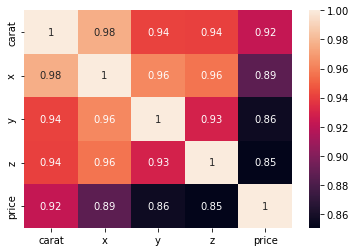

In [20]:
columns=['carat','x','y','z','price']                             # Correlation Matrix plot 2
corrMatrix = df.loc[:,columns].corr()
corrMatrix
sns.heatmap(corrMatrix, annot=True)

In [21]:
# High Correlation
# By observing corrlation matrix plot 2 we can say:-
# 1. Price is highly correlated to carat of zirconia followed by x(lenghth), y(width) and z(height)
# 2. Carat is highly correlated to x followed by y and z 

# Least Correlation
# By observing correlation matix plot 1 we can say :-
# 1. Least Correlatio is found between table and depth

### Pearson Correlation - for Categorical (obj type) variable

###### HO:- There is no significant association between the two categorical variables

In [22]:
chi_sq_table1 = pd.crosstab(df['cut'],df['clarity'])
print('contingency table: \n', chi_sq_table1)

contingency table: 
 clarity     I1   IF   SI1   SI2   VS1   VS2  VVS1  VVS2
cut                                                    
Fair        89    4   193   225    93   129    10    38
Good        51   30   765   530   331   491   100   143
Ideal       74  613  2150  1324  1784  2528  1036  1307
Premium    108  115  1809  1449   998  1697   307   416
Very Good   43  132  1654  1047   887  1254   386   627


In [23]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(chi_sq_table1)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     1967.8
p-value:            0
degrees of freedom: 28
expected frequencies:
 [[  10.57088293   25.89142285  190.30485408  132.49805318  118.53869544
   176.63510958   53.25987318   73.30110876]
 [  33.03908481   80.92312827  594.79404457  414.1200356   370.49034005
   552.06952942  166.4626766   229.10116068]
 [ 146.39522379  358.56802759 2635.51511106 1834.95383246 1641.6319205
  2446.20402714  737.59127823 1015.14057923]
 [  93.3783884   228.71309378 1681.06682241 1170.42774502 1047.11710609
  1560.31449549  470.47357882  647.50876998]
 [  81.61642007  199.90432751 1469.31916787 1023.00033374  915.22193792
  1363.77683836  411.21259317  565.94838135]]


In [24]:
# Critical value =16.93 with degree of freedom 28 and alpha 0.05
# Since test statistics= 1967.8 exceeds critical value, the null hypothesis is rejected

In [25]:
#Goodness of fit

In [26]:
ct_table=pd.crosstab(df["cut"],df["clarity"])
print('contingency_table :\n',ct_table)

contingency_table :
 clarity     I1   IF   SI1   SI2   VS1   VS2  VVS1  VVS2
cut                                                    
Fair        89    4   193   225    93   129    10    38
Good        51   30   765   530   331   491   100   143
Ideal       74  613  2150  1324  1784  2528  1036  1307
Premium    108  115  1809  1449   998  1697   307   416
Very Good   43  132  1654  1047   887  1254   386   627


In [27]:
Observed_Values = ct_table.values 
print("Observed Values :\n",Observed_Values)

Observed Values :
 [[  89    4  193  225   93  129   10   38]
 [  51   30  765  530  331  491  100  143]
 [  74  613 2150 1324 1784 2528 1036 1307]
 [ 108  115 1809 1449  998 1697  307  416]
 [  43  132 1654 1047  887 1254  386  627]]


In [28]:
ev=scipy.stats.chi2_contingency(ct_table)
Expected_Values = ev[3]
print("Expected Values :\n",Expected_Values)

Expected Values :
 [[  10.57088293   25.89142285  190.30485408  132.49805318  118.53869544
   176.63510958   53.25987318   73.30110876]
 [  33.03908481   80.92312827  594.79404457  414.1200356   370.49034005
   552.06952942  166.4626766   229.10116068]
 [ 146.39522379  358.56802759 2635.51511106 1834.95383246 1641.6319205
  2446.20402714  737.59127823 1015.14057923]
 [  93.3783884   228.71309378 1681.06682241 1170.42774502 1047.11710609
  1560.31449549  470.47357882  647.50876998]
 [  81.61642007  199.90432751 1469.31916787 1023.00033374  915.22193792
  1363.77683836  411.21259317  565.94838135]]


In [29]:
no_of_rows=len(ct_table.iloc[0:5,0])
no_of_columns=len(ct_table.iloc[0,0:2])
data=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:",data)

Degree of Freedom: 4


In [30]:
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:",chi_square_statistic)

chi-square statistic: 958.7150348070272


#### The critical value for the chi-square test with a degree of freedom of 2 and alpha 0.05 is 3.357
#Since the test statistic (958.71) exceeds the critical value the null hypothesis is rejected.
### Therefore, cut and clarity have a significant variation in the distribution. This could be concluded thatthere is a substantial dependency of clarity on cut  according to data

In [31]:
chi_sq_table1 = pd.crosstab(df['color'],df['clarity'])
print('contingency table: \n', chi_sq_table1)

contingency table: 
 clarity  I1   IF   SI1  SI2   VS1   VS2  VVS1  VVS2
color                                              
D        25   38  1040  671   369   804   121   276
E        54   87  1249  849   625  1202   342   509
F        67  183  1088  753   672  1107   360   499
G        68  342  1001  779  1078  1205   507   681
H        82  149  1082  796   595   804   288   306
I        48   69   725  469   480   603   183   194
J        21   26   386  258   274   374    38    66


In [32]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(chi_sq_table1)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     954.17
p-value:            1.0232e-172
degrees of freedom: 42
expected frequencies:
 [[  45.26124523  110.85904995  814.82641747  567.31560797  507.54596359
   756.29680721  228.04227389  313.8526347 ]
 [  66.55189676  163.00656358 1198.11647569  834.17788408  746.29291356
  1112.05484481  335.31215931  461.48726221]
 [  64.00730522  156.77405718 1152.30685653  802.28334631  717.75863092
  1069.53576594  322.49160085  443.84243705]
 [  76.62198242  187.67137613 1379.40560685  960.39882078  859.21581933
  1280.3218378   386.04883747  531.31571921]
 [  55.52082175  135.98798532  999.52690325  695.91166982  622.59376275
   927.73011458  279.73367449  384.99506805]
 [  37.50565506   91.86316609  675.2045463   470.10512849  420.57711277
   626.70408277  188.96684837  260.07346016]
 [  19.53109356   47.83780176  351.6131939   244.80754255  219.01579709
   326.35654689   98.40460563  135.43341862]]


###### Critical value = 28.14 with degree of freedom 42 and alpha 0.05
 Since test statistics= 1967.8 exceeds critical value, the null hypothesis is rejected
### Therefore, cut and clarity have a significant variation in the distribution. This could be concluded that there is asubstantial dependency of clarity on color  according to data

# EDA

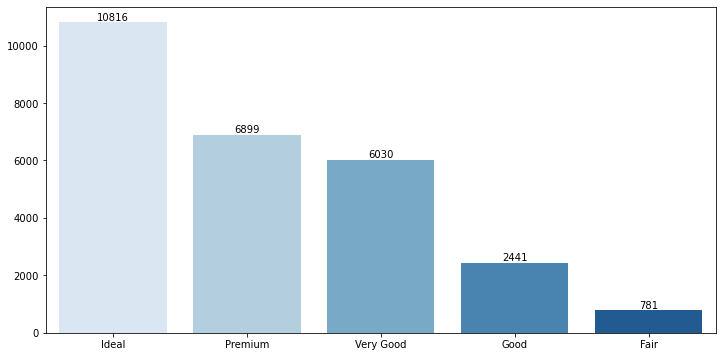

In [33]:
name= df['cut'].value_counts()
plt.figure(figsize=(12,6))
ax = sns.barplot(x=list(name.keys()),y=list(name.values),palette='Blues')
for container in ax.containers:
    ax.bar_label(container)

<AxesSubplot:xlabel='cut', ylabel='price'>

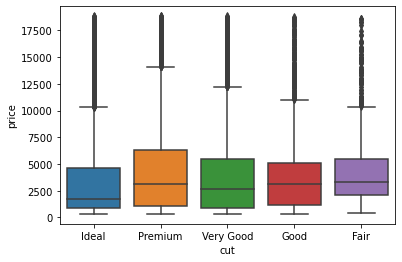

In [34]:
sns.boxplot(y = df['price'], x = df['cut'])

In [35]:
#Most indviduals have took the ideal fit cut(quality) followed by premium and very good
# Very few individuals has choose good and fair cut (quality)
# Most of the Premium quality zirconia has been sold in high price followed by ideal and fair
# 50% of the the price of ideal quality zirconia ranges between 1000 to 4900 with outliers being in range of 10000 to 17500
# 50% of the the price of premium quality zirconia ranges between 1000 to 6500 with outliers being in range of 13000 to 17500
# 50% of the the price of very good quality zirconia ranges between 500 to 6000 with outliers being in range of 12500 to 1700
# 50% of the the price of good quality zirconia ranges between 900 to 4900 with outliers being in range of 11000 to 17500
# 50% of the the price of fair quality zirconia ranges between 2500 to 5000 with outliers in being in range of 10000 to 17500

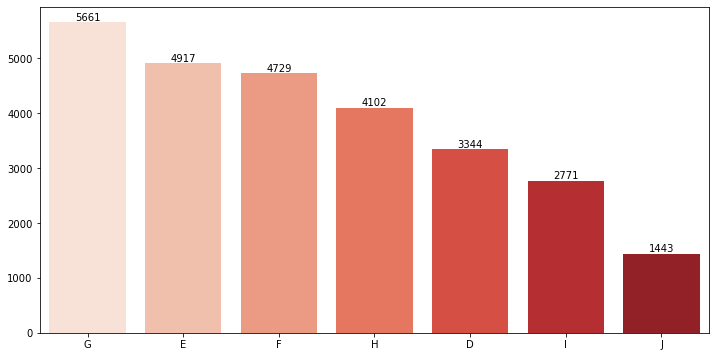

In [36]:
name= df['color'].value_counts()
plt.figure(figsize=(12,6))
ax = sns.barplot(x=list(name.keys()),y=list(name.values),palette='Reds')
for container in ax.containers:
    ax.bar_label(container)

<AxesSubplot:xlabel='color', ylabel='price'>

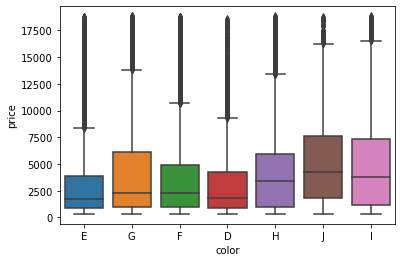

In [37]:
sns.boxplot(y = df['price'], x = df['color'])

In [38]:
# Most people have choose the intermediate color of G 
# Least number of individuals have choose the worst color J 
#Best color of D is choose by 3344 individuals
# 50% of the price of color E ranges in between 1500 to 3500 with most outliers in range of 8500 to 17500
# 50% of the price of color G ranges in between 1500 to 6000 with outliers being in range of 13500 to 17500
# 50% of the price of color F ranges in between 1500 to 5000 with most outliers in range of 11500 to 17500
# 50% of the price of color D ranges in between 1500 to 4000 with outliers being in range of 8500 to 17500
# 50% of the price of color H ranges in between 1500 to 6000 with most outliers in range of 13500 to 17500
# 50% of the price of color J ranges in between 2500 to 7500 with outliers being in range of 13500 to 15500
# 50% of the price of color I ranges in between 1500 to 6500 with most outliers in range of 8500 to 16500


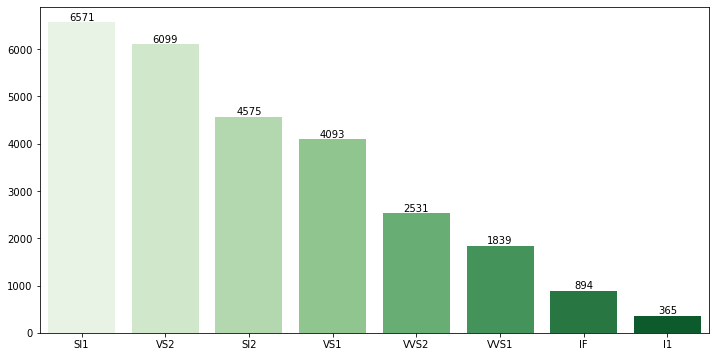

In [39]:
name= df['clarity'].value_counts()
plt.figure(figsize=(12,6))
ax = sns.barplot(x=list(name.keys()),y=list(name.values),palette='Greens')
for container in ax.containers:
    ax.bar_label(container)

<AxesSubplot:xlabel='clarity', ylabel='price'>

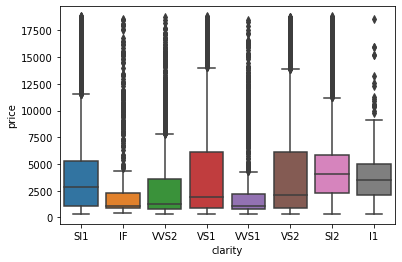

In [40]:
sns.boxplot(y = df['price'], x = df['clarity'])

In [41]:
# Most individuals has choose clarity of Sl1 and VS2 
# None of the individuals has choose (flawless) Fl and and VS2
# 50% of the price of SI1 clarity ranges in between 1000 to 5000 with outliers being in range of 11500 to 17500
# 50% of the price of IF clarity ranges in between 1000 to 2500 with outliers being in range of 5000 to 17500
# 50% of the price of VVS2 clarity ranges in between 1000 to 3500 with outliers being in range of 11500 to 17500
# 50% of the price of VS1 clarity ranges in between 1000 to 6000 with outliers being in range of 7500 to 17500
# 50% of the price of VVS1 clarity ranges in between 1000 to 1500 with outliers being in range of 13500 to 17500
# 50% of the price of VS2 clarity ranges in between 1000 to 6000 with outliers being in range of 4000 to 17500
# 50% of the price of SI2 clarity ranges in between 1000 to 5500 with outliers being in range of 11000 to 17500
# 50% of the price of I1clarity ranges in between 1000 to 5000 with outliers being in range of 10000to 17500

### Univariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


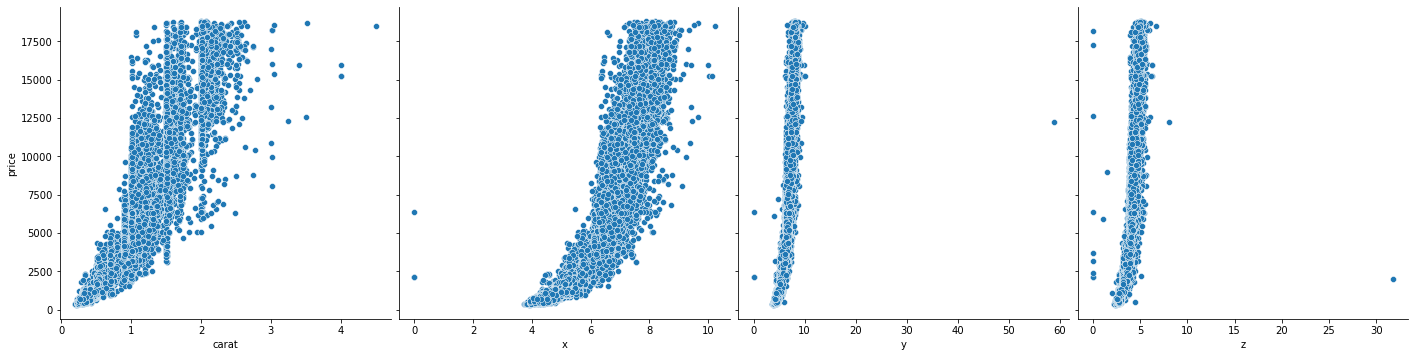

In [42]:
sns.pairplot(df, x_vars = ['carat','x','y','z'], y_vars = 'price', size = 5, kind = 'scatter')

In [43]:
# Price of zirconia is directly correlated to carat anf partially to length(x)

### Multivariate Analysis

In [ ]:
sns.pairplot(df,hue='cut',size=3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


In [ ]:
sns.pairplot(df,hue='color',size=3)

In [ ]:
sns.pairplot(df,hue='clarity',size=3)

## Interpretations

###### High Correlation
By observing corrlation matrix plot 2 we can say:-
1. Price is highly correlated to carat of zirconia followed by x(lenghth), y(width) and z(height)
2. Carat is highly correlated to x followed by y and z 

##### Least Correlation
By observing correlation matix plot 1 we can say :-
1. Least Correlatio is found between table and depth

##### Using Chi sq test
We know all the categorical variables cut(quality), clarity, and color are correlated

##### Using EDA (Cut)
- Most indviduals have took the ideal fit cut(quality) followed by premium and very good
- Very few individuals has choose good and fair cut (quality)
- Most of the Premium quality zirconia has been sold in high price followed by ideal and fair

#50% of the the price of ideal quality zirconia ranges between 1000 to 4900 with outliers being in range of 10000 to 17500

#50% of the the price of premium quality zirconia ranges between 1000 to 6500 with outliers being in range of 13000 to 17500

#50% of the the price of very good quality zirconia ranges between 500 to 6000 with outliers being in range of 12500 to 1700

#50% of the the price of good quality zirconia ranges between 900 to 4900 with outliers being in range of 11000 to 17500

#50% of the the price of fair quality zirconia ranges between 2500 to 5000 with outliers in being in range of 10000 to 17500

##### Using EDA(color)
- Most people have choose the intermediate color of G 
- Least number of individuals have choose the worst color J 
- Best color of D is choose by 3344 individuals

#50% of the price of color E ranges in between 1500 to 3500 with most outliers in range of 8500 to 17500

#50% of the price of color G ranges in between 1500 to 6000 with outliers being in range of 13500 to 17500

#50% of the price of color F ranges in between 1500 to 5000 with most outliers in range of 11500 to 17500

#50% of the price of color D ranges in between 1500 to 4000 with outliers being in range of 8500 to 17500

#50% of the price of color H ranges in between 1500 to 6000 with most outliers in range of 13500 to 17500

#50% of the price of color J ranges in between 2500 to 7500 with outliers being in range of 13500 to 15500

#50% of the price of color I ranges in between 1500 to 6500 with most outliers in range of 8500 to 16500

##### Using EDA (clarity)
- Most individuals has choose clarity of Sl1 and VS2 
- None of the individuals has choose (flawless) Fl and and VS2

#50% of the price of SI1 clarity ranges in between 1000 to 5000 with outliers being in range of 11500 to 17500

#50% of the price of IF clarity ranges in between 1000 to 2500 with outliers being in range of 5000 to 17500

#50% of the price of VVS2 clarity ranges in between 1000 to 3500 with outliers being in range of 11500 to 17500

#50% of the price of VS1 clarity ranges in between 1000 to 6000 with outliers being in range of 7500 to 17500

#50% of the price of VVS1 clarity ranges in between 1000 to 1500 with outliers being in range of 13500 to 17500

#50% of the price of VS2 clarity ranges in between 1000 to 6000 with outliers being in range of 4000 to 17500

#50% of the price of SI2 clarity ranges in between 1000 to 5500 with outliers being in range of 11000 to 17500

#50% of the price of I1clarity ranges in between 1000 to 5000 with outliers being in range of 10000to 17500